In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
%matplotlib inline
from scipy.spatial.distance import pdist,cdist
from scipy.stats import gaussian_kde
from scipy.spatial import Voronoi, voronoi_plot_2d, ConvexHull
from collections import defaultdict
from shapely.geometry import Polygon,Point
from operator import itemgetter
import gudhi
import scipy
from scipy import optimize
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
import patsy
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
from statsmodels.distributions.empirical_distribution import ECDF
    
import pandas as pd

In [2]:
#importaion of PD samples from respective codes
D_St_low = np.load("PDchains/LowNoiseStrauss_G.npy",allow_pickle=True).item()
D_St_med = np.load("PDchains/MedNoiseStrauss_G.npy",allow_pickle=True).item()
D_St_hig = np.load("PDchains/HigNoiseStrauss_G.npy",allow_pickle=True).item()

D_PC_low = np.load("PDchains/LowNoisePCPI_G.npy",allow_pickle=True).item()
D_PC_med = np.load("PDchains/MedNoisePCPI_G.npy",allow_pickle=True).item()
D_PC_hig = np.load("PDchains/HigNoisePCPI_G.npy",allow_pickle=True).item()

D_SC_low = np.load("PDchains/LowNoiseSC_G.npy",allow_pickle=True).item()
D_SC_med = np.load("PDchains/MedNoiseSC_G.npy",allow_pickle=True).item()
D_SC_hig = np.load("PDchains/HigNoiseSC_G.npy",allow_pickle=True).item()

pd1_low = np.load("PDoriginal/PDlownoise.npy",allow_pickle=True)
pd1_med = np.load("PDoriginal/PDmednoise.npy",allow_pickle=True)
pd1_hig = np.load("PDoriginal/PDhignoise.npy",allow_pickle=True)


In [3]:
order_low = np.sort(pd1_low[:,1])[::-1]
order_med = np.sort(pd1_med[:,1])[::-1]
order_hig = np.sort(pd1_hig[:,1])[::-1]
ite = 100000

In [4]:
def RunAvg(D_comp_loglin,ite):
    """
    etracts the Nth highest point's persistense value for N=1,2,3,4
    @input: D_comp_loglin- a 'ite' sized dict consisting of 2xk numpy array
    @itput: ite- value
    @output: classloglinX a 1x'ite' array consiting of the Xth most persisent point in D_comp_loglin
    """
    classloglin1 = np.array([np.max(D_comp_loglin[i][:,1]) for i in range(ite)])
    #to build classloglin2, we need to grab the second highest persistence from each of the ite iterations
    #however, some diagrams may not have enough points. In that case, we set value to nan and omit
    classloglin2 = np.zeros(ite) #initialize classloglin 2
    for i in range(ite): #loop over the ite iterations
        D_tmp = D_comp_loglin[i].copy() #set D_tmp to copy in order to not change the original
        pers_tmp = np.sort(D_tmp[:,1])[::-1] #sort persistence in D_tmp from largest to smallest
        if pers_tmp.shape[0]<5: #if there are not enough points, pad on right with nan
            tmp = np.nan*np.zeros(5)
            tmp[:pers_tmp.shape[0]] = pers_tmp
            pers_tmp = tmp
        classloglin2[i] = pers_tmp[1] #grab the second highest value (or nan)
    classloglin2 = classloglin2[classloglin2==classloglin2] #omit the nan values
    #to build classloglin3, we need to grab the second highest persistence from each of the ite iterations
    #however, some diagrams may not have enough points. In that case, we set value to nan and omit
    classloglin3 = np.zeros(ite) #initialize classloglin 2
    for i in range(ite): #loop over the ite iterations
        D_tmp = D_comp_loglin[i].copy() #set D_tmp to copy in order to not change the original
        pers_tmp = np.sort(D_tmp[:,1])[::-1] #sort persistence in D_tmp from largest to smallest
        if pers_tmp.shape[0]<5: #if there are not enough points, pad on right with nan
            tmp = np.nan*np.zeros(5)
            tmp[:pers_tmp.shape[0]] = pers_tmp
            pers_tmp = tmp
        classloglin3[i] = pers_tmp[2] #grab the third highest value (or nan)
    classloglin3 = classloglin3[classloglin3==classloglin3] #omit the nan values
    #to build classloglin4, we need to grab the second highest persistence from each of the ite iterations
    #however, some diagrams may not have enough points. In that case, we set value to nan and omit
    classloglin4 = np.zeros(ite) #initialize classloglin 2
    for i in range(ite): #loop over the ite iterations
        D_tmp = D_comp_loglin[i].copy() #set D_tmp to copy in order to not change the original
        pers_tmp = np.sort(D_tmp[:,1])[::-1] #sort persistence in D_tmp from largest to smallest
        if pers_tmp.shape[0]<5: #if there are not enough points, pad on right with nan
            tmp = np.nan*np.zeros(5)
            tmp[:pers_tmp.shape[0]] = pers_tmp
            pers_tmp = tmp
        classloglin4[i] = pers_tmp[3] #grab the fourth highest value (or nan)
    classloglin4 = classloglin4[classloglin4==classloglin4] #omit the nan values
    return classloglin1, classloglin2, classloglin3, classloglin4

In [5]:
o1_PC_low, o2_PC_low, o3_PC_low, o4_PC_low = RunAvg(D_PC_low,ite) #PCPIlow
o1_PC_med, o2_PC_med, o3_PC_med, o4_PC_med = RunAvg(D_PC_med,ite) #PCPImedium
o1_PC_hig, o2_PC_hig, o3_PC_hig, o4_PC_hig = RunAvg(D_PC_hig,ite) #PCPIhigh

o1_St_low, o2_St_low, o3_St_low, o4_St_low = RunAvg(D_St_low,ite) #Strausslow
o1_St_med, o2_St_med, o3_St_med, o4_St_med = RunAvg(D_St_med,ite) #Straussmedium
o1_St_hig, o2_St_hig, o3_St_hig, o4_St_hig = RunAvg(D_St_hig,ite) #Strausshigh

o1_SC_low, o2_SC_low, o3_SC_low, o4_SC_low = RunAvg(D_SC_low,ite) #Softcorelow
o1_SC_med, o2_SC_med, o3_SC_med, o4_SC_med = RunAvg(D_SC_med,ite) #Softcoremedium
o1_SC_hig, o2_SC_hig, o3_SC_hig, o4_SC_hig = RunAvg(D_SC_hig,ite) #Softcorehigh

In [6]:
k=np.array([2,2,3,31,1]) #temp
yaxis=np.array([0,1.2])

In [7]:
print('o(1) Gauss low noise')

cdiff = np.abs(o1_St_low - order_low[0])
s1l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(1) St', s1l[-1])

cdiff = np.abs(o1_PC_low - order_low[0])
p1l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(1) PC', p1l[-1])

cdiff = np.abs(o1_SC_low - order_low[0])
c1l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(1) SC', c1l[-1])


o(1) Gauss low noise
low o(1) St 0.5939450200805536
low o(1) PC 0.35759117800069407
low o(1) SC 0.48258037756590016


In [8]:
print('o(2) Gauss low noise')

cdiff = np.abs(o2_St_low - order_low[1])
s2l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(2) St', s2l[-1])

cdiff = np.abs(o2_PC_low - order_low[1])
p2l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(2) PC', p2l[-1])

cdiff = np.abs(o2_SC_low - order_low[1])
c2l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(2) SC', c2l[-1])


o(2) Gauss low noise
low o(2) St 0.6083033993604756
low o(2) PC 0.3752437932241743
low o(2) SC 0.47342197369010164


In [9]:
print('o(3) Gauss low noise')

cdiff = np.abs(o3_St_low - order_low[2])
s3l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(3) St', s3l[-1])

cdiff = np.abs(o3_PC_low - order_low[2])
p3l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(3) PC', p3l[-1])

cdiff = np.abs(o3_SC_low - order_low[2])
c3l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(3) SC', c3l[-1])


o(3) Gauss low noise
low o(3) St 0.5675925170974566
low o(3) PC 0.37706142390945624
low o(3) SC 0.453744809724931


In [10]:
print('o(4) Gauss low noise')

cdiff = np.abs(o4_St_low - order_low[3])
s4l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(4) St', s4l[-1])

cdiff = np.abs(o4_PC_low - order_low[3])
p4l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(4) PC', p4l[-1])

cdiff = np.abs(o4_SC_low - order_low[3])
c4l=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('low o(4) SC', c4l[-1])


o(4) Gauss low noise
low o(4) St 0.24533116786059683
low o(4) PC 0.34463295168123115
low o(4) SC 0.2766024606054406


In [11]:
print('o(1) Gauss med noise')

cdiff = np.abs(o1_St_med - order_med[0])
s1m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('med o(1) St', s1m[-1])

cdiff = np.abs(o1_PC_med - order_med[0])
p1m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('med o(1) PC', p1m[-1])

cdiff = np.abs(o1_SC_med - order_med[0])
c1m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('med o(1) SC', c1m[-1])


o(1) Gauss med noise
med o(1) St 0.4320598093574494
med o(1) PC 0.41088998794191833
med o(1) SC 0.42016215927531864


In [12]:
print('o(2) Gauss med noise')

cdiff = np.abs(o2_St_med - order_med[1])
s2m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s2m[-1])

cdiff = np.abs(o2_PC_med - order_med[1])
p2m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p2m[-1])

cdiff = np.abs(o2_SC_med - order_med[1])
c2m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c2m[-1])


o(2) Gauss med noise
St 0.4152516894279083
PC 0.3882976549874665
SC 0.3964770074533698


In [13]:
print('o(3) Gauss med noise')

cdiff = np.abs(o3_St_med - order_med[2])
s3m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s3m[-1])

cdiff = np.abs(o3_PC_med - order_med[2])
p3m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p3m[-1])

cdiff = np.abs(o3_SC_med - order_med[2])
c3m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c3m[-1])


o(3) Gauss med noise
St 0.4197716133664301
PC 0.3856763311864321
SC 0.3943675131967949


In [14]:
print('o(4) Gauss med noise')

cdiff = np.abs(o4_St_med - order_med[3])
s4m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s4m[-1])

cdiff = np.abs(o4_PC_med - order_med[3])
p4m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p4m[-1])

cdiff = np.abs(o4_SC_med - order_med[3])
c4m=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c4m[-1])


o(4) Gauss med noise
St 0.2319843727318703
PC 0.26559069586875567
SC 0.2527991695985038


In [15]:
print('o(1) Gauss hig noise')

cdiff = np.abs(o1_St_hig - order_hig[0])
s1h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s1h[-1])

cdiff = np.abs(o1_PC_hig - order_hig[0])
p1h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p1h[-1])

cdiff = np.abs(o1_SC_hig - order_hig[0])
c1h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c1h[-1])


o(1) Gauss hig noise
St 0.06279361202520974
PC 0.048437045933684544
SC 0.0622996932718861


In [16]:
print('o(2) Gauss hig noise')

cdiff = np.abs(o2_St_hig - order_hig[1])
s2h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s2h[-1])

cdiff = np.abs(o2_PC_hig - order_hig[1])
p2h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p2h[-1])

cdiff = np.abs(o2_SC_hig - order_hig[1])
c2h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c2h[-1])


o(2) Gauss hig noise
St 0.10193359274956386
PC 0.07784433780064084
SC 0.10217944363669768


In [17]:
print('o(3) Gauss hig noise')

cdiff = np.abs(o3_St_hig - order_hig[2])
s3h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s3h[-1])

cdiff = np.abs(o3_PC_hig - order_hig[2])
p3h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p3h[-1])

cdiff = np.abs(o3_SC_hig - order_hig[2])
c3h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c3h[-1])


o(3) Gauss hig noise
St 0.17862876859240495
PC 0.22864803856650776
SC 0.17974192683814424


In [18]:
print('o(4) Gauss hig noise')

cdiff = np.abs(o4_St_hig - order_hig[3])
s4h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('St', s4h[-1])

cdiff = np.abs(o4_PC_hig - order_hig[3])
p4h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('PC', p4h[-1])

cdiff = np.abs(o4_SC_hig - order_hig[3])
c4h=[np.mean(cdiff[:i]) for i in range(1,ite)]
print('SC', c4h[-1])
#plt.plot(k,label="SoftCore")


o(4) Gauss hig noise
St 0.21916072637813946
PC 0.2923875343329996
SC 0.2238685952624041


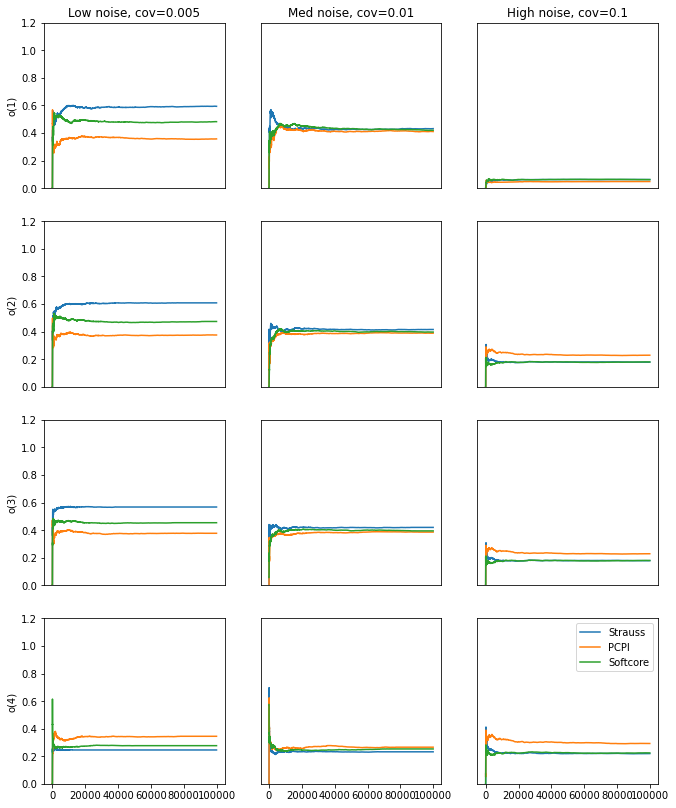

In [20]:
fig, ax = plt.subplots(4,3)

fig.set_size_inches(11, 14)
ax[0,0].plot(s1l)
ax[0,0].plot(p1l)
ax[0,0].plot(c1l)
ax[0,0].set_ylim(yaxis)
ax[0,0].xaxis.set_visible(False)

ax[0,1].plot(s1m)
ax[0,1].plot(p1m)
ax[0,1].plot(c1m)
ax[0,1].set_ylim(yaxis)
ax[0,1].xaxis.set_visible(False)
ax[0,1].yaxis.set_visible(False)

ax[0,2].plot(s1h)
ax[0,2].plot(p1h)
ax[0,2].plot(c1h)
ax[0,2].set_ylim(yaxis)
ax[0,2].xaxis.set_visible(False)
ax[0,2].yaxis.set_visible(False)


ax[1,0].plot(s2l)
ax[1,0].plot(p2l)
ax[1,0].plot(c2l)
ax[1,0].set_ylim(yaxis)
ax[1,0].xaxis.set_visible(False)

ax[1,1].plot(s2m)
ax[1,1].plot(p2m)
ax[1,1].plot(c2m)
ax[1,1].set_ylim(yaxis)
ax[1,1].xaxis.set_visible(False)
ax[1,1].yaxis.set_visible(False)

ax[1,2].plot(s3h)
ax[1,2].plot(p3h)
ax[1,2].plot(c3h)
ax[1,2].set_ylim(yaxis)
ax[1,2].xaxis.set_visible(False)
ax[1,2].yaxis.set_visible(False)


ax[2,0].plot(s3l)
ax[2,0].plot(p3l)
ax[2,0].plot(c3l)
ax[2,0].set_ylim(yaxis)
ax[2,0].xaxis.set_visible(False)

ax[2,1].plot(s3m)
ax[2,1].plot(p3m)
ax[2,1].plot(c3m)
ax[2,1].set_ylim(yaxis)
ax[2,1].xaxis.set_visible(False)
ax[2,1].yaxis.set_visible(False)

ax[2,2].plot(s3h)
ax[2,2].plot(p3h)
ax[2,2].plot(c3h)
ax[2,2].set_ylim(yaxis)
ax[2,2].xaxis.set_visible(False)
ax[2,2].yaxis.set_visible(False)


ax[3,0].plot(s4l)
ax[3,0].plot(p4l)
ax[3,0].plot(c4l)
ax[3,0].set_ylim(yaxis)

ax[3,1].plot(s4m)
ax[3,1].plot(p4m)
ax[3,1].plot(c4m)
ax[3,1].set_ylim(yaxis)
ax[3,1].yaxis.set_visible(False)

ax[3,2].plot(s4h,label='Strauss')
ax[3,2].plot(p4h,label='PCPI')
ax[3,2].plot(c4h,label='Softcore')
ax[3,2].set_ylim(yaxis)
ax[3,2].legend(bbox_to_anchor=(1, 1))
ax[3,2].yaxis.set_visible(False)

ax[0,0].title.set_text("Low noise, cov=0.005")
ax[0,1].title.set_text("Med noise, cov=0.01")
ax[0,2].title.set_text("High noise, cov=0.1")

ax[0,0].set_ylabel("o(1)")
ax[1,0].set_ylabel("o(2)")
ax[2,0].set_ylabel("o(3)")
ax[3,0].set_ylabel("o(4)")

plt.show()
fig.savefig("images/GuasssRA.jpg",bbox_inches = "tight")

In [1]:
#transfering of files for comparison to Voronoi tesselation PPMs
np.save('RA_new/gc1l', c1l)
np.save('RA_new/gp1l', p1l)
np.save('RA_new/gs1l', s1l)

np.save('RA_new/gc2m', c2m)
np.save('RA_new/gp2m', p2m)
np.save('RA_new/gs2m', s2m)

np.save('RA_new/gc3h', c3h)
np.save('RA_new/gp3h', p3h)
np.save('RA_new/gs3h', s3h)

NameError: name 'np' is not defined